## 첫번째 모델 만들기

In [14]:
!pip install fastai
!pip install fastbook
!pip install bottle==0.11.6
!pip install devpi

     ---------------------------------------- 77.7/77.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 265.7/265.7 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 42.9/42.9 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 83.5/83.5 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 98.7/98.7 kB 1.9 MB/s eta 0:00:00
  Using cached ruamel.yaml-0.17.21-py3-none-any.whl (109 kB)
     -------------------------------------- 130.8/130.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 57.7/57.7 kB ? eta 0:00:00
     -------------------------------------- 525.6/525.6 kB 4.1 MB/s eta 0:00:00
     -------------------------------------- 246.6/246.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (

## 이미지 인식 모델의 작동 방식

In [5]:
from fastai.vision.all import * # 다양한 영상처리 모델을 생성하는 라이브러리
path = untar_data(URLs.PETS)/'images' # fast.ai의 데이터 컬렉션에서 데이터셋을 서버에 다운로드하고 압축을 해제한 다음 추출된 위치를 Path 객체로 변환

def is_cat(x): return x[0].isupper() # 데이터셋에 포함된 파일명의 규칙에 다라 고양이 레이블을 지정하는 함수를 정의
# 이 함수를 통해 fastai에 데이터셋의 종류와 구조화 방법을 알려줌
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\csjty/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.163481,0.021970,0.008119,30:46


epoch,train_loss,valid_loss,error_rate,time
0,0.065799,0.017381,0.005413,40:40


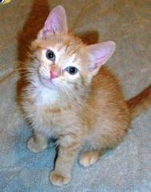

In [12]:
from fastbook import *
img = PILImage.create(image_cat())
img.to_thumb(192)

In [17]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

In [20]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f'고양이냥: {is_cat}')
print(f'{probs[1].item():.6f}')

AttributeError: 'FileUpload' object has no attribute 'data'

In [22]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.008376,2.433291,00:52


epoch,train_loss,valid_loss,time
0,1.745847,1.533770,01:00
1,1.534104,1.315962,01:01
2,1.400264,1.151728,01:01
3,1.273794,1.067889,01:02
4,1.165017,0.825530,01:01
5,1.060960,0.827314,01:04
6,0.975205,0.749775,01:03
7,0.907401,0.746268,01:04


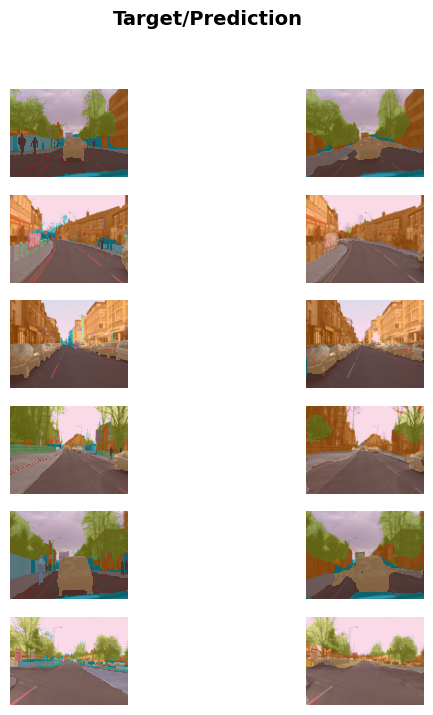

In [23]:
learn.show_results(max_n=6, figsize=(7,8))

In [24]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


KeyboardInterrupt: 

In [ ]:
learn.predict('I really liked that movie!')